In [8]:
import pandas as pd
import os

#### Uno los doce meses en uno solo

In [9]:
df = pd.read_csv(r"C:\Users\usuario\Desktop\Gino\4TO 2.0\BaseDeDatosParaAnalisis\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:\Users\usuario\Desktop\Gino\4TO 2.0\BaseDeDatosParaAnalisis\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/usuario/Desktop/Gino/4TO 2.0/BaseDeDatosParaAnalisis/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)

In [10]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cual fue el mejor mes de ventas? cuanto se gano ese mes?

#### Limpio los datos por los NaN

In [13]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Agrego columnas

In [15]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Elimino los or

In [14]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convierto las columnas a int pq estan en string 

In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Agrego una columna de ventas

In [21]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [25]:
resultados =all_data.groupby('Month').sum()

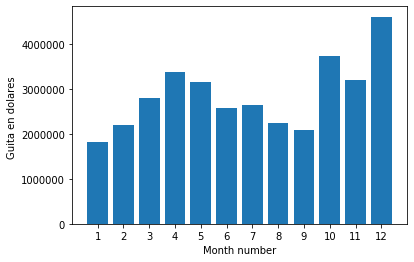

In [27]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.bar(months,resultados['Sales'])
plt.xticks(months)
plt.ylabel('Guita en dolares ')
plt.xlabel('Month number')
plt.show()

#### Que ciudad tuve el numero mas alto de ventas

In [35]:
# Agrego ciudad
#El lambda lo uso para referirme a la celda

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')') 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


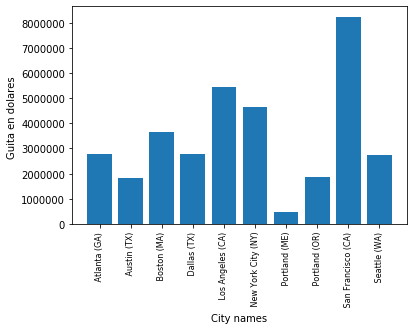

In [37]:
resultados = all_data.groupby('City').sum()
cities = [city for city, df in all_data.groupby('City')] # Para que me lo ordene por ciudad en el grafico de abajo
plt.bar(cities,resultados['Sales'])
plt.xticks(cities,rotation='vertical', size = 8)
plt.ylabel('Guita en dolares ')
plt.xlabel('City names')
plt.show()

#### En que tiempo debemos invertir en publicidad para mejorar la venta

In [39]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) 

In [40]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

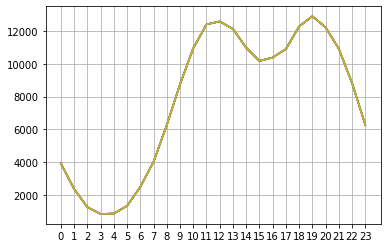

In [42]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show() 
#Viedo el grafico mi recomendacion es a las 11 y a las 7pm

#### Que productos son mayormente vendidos juntos

In [18]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Grouped
3,176560,"Google Phone , Wired Headphones"
18,176574,"Google Phone , USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones , Bose SoundSport H..."
32,176586,"AAA Batteries (4-pack) , Google Phone"
119,176672,"Lightning Charging Cable , USB-C Charging Cable"


In [25]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone ', ' Lightning Charging Cable') 886
('Google Phone ', ' USB-C Charging Cable') 859
('iPhone ', ' Wired Headphones') 443
('Google Phone ', ' Wired Headphones') 405
('iPhone ', ' Apple Airpods Headphones') 329
('Vareebadd Phone ', ' USB-C Charging Cable') 312
('Google Phone ', ' Bose SoundSport Headphones') 192
('Vareebadd Phone ', ' Wired Headphones') 140
('Google Phone ', ' USB-C Charging Cable ') 128
('iPhone ', ' Lightning Charging Cable ') 119
